Practicing
===
<Big>
Amazing, the sound Sound: <Br>
<div align="center">
Guiltar
<audio controls="controls" src="https://drive.google.com/uc?export=view&id=1N_QbtIXYXoaEPuUOz5ANRoTO9XUM2fu1">

In [23]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable
from typing import List, Tuple, Dict, Optional
import math
from numpy import pi,sin,exp,cos
from enum import Enum
from IPython.display import display

In [3]:
class MusicGenerator:
    def __init__(self, sample_rate: int = 22050):
        self.sample_rate = sample_rate
        self.base_duration = 1
        self.base_note = 440  # A4

    def get_frequency(self, note: int) -> float:
        """Calculate frequency for a given note number (MIDI)"""
        return self.base_note * 2**((note-69)/12)

    def get_time_array(self, duration: float) -> np.ndarray:
        """Generate time array for the given duration"""
        return np.linspace(0, duration, int(self.base_duration * self.sample_rate * duration))

    # 包絡函數 (Envelope functions)
    @staticmethod
    def sine_env(t: np.ndarray) -> np.ndarray:
        """Sine envelope"""
        return np.sin(np.pi * t/t[-1])

    @staticmethod
    def flute_env(t: np.ndarray) -> np.ndarray:
        """Flute-like envelope"""
        return np.sin(np.pi * t/t[-1])**0.4

    @staticmethod
    def guitar_env(t: np.ndarray) -> np.ndarray:
        """Guitar-like envelope with attack and decay"""
        return (1 - np.exp(-80*t)) * np.exp(-8*t)

    @staticmethod
    def violin_env(t: np.ndarray) -> np.ndarray:
        """Violin-like envelope with sustain"""
        attack = 0.1
        decay = 0.2
        sustain_level = 0.7
        release = 0.3

        normalized_t = t/t[-1]
        mask = normalized_t < attack
        env = np.zeros_like(t)

        env[mask] = normalized_t[mask]/attack
        mask = (normalized_t >= attack) & (normalized_t < attack + decay)
        env[mask] = 1 - (1-sustain_level)*(normalized_t[mask]-attack)/decay
        mask = (normalized_t >= attack + decay) & (normalized_t < 1 - release)
        env[mask] = sustain_level
        mask = normalized_t >= 1 - release
        env[mask] = sustain_level*(1-(normalized_t[mask]-(1-release))/release)

        return env
    def generate_note(self,
                     note: int,
                     duration: float,
                     envelope_func: Callable,
                     harmonics: List[Tuple[float, float]] = [(1.0, 1.0)]) -> np.ndarray:
        """
        Generate a single note with the given parameters
        harmonics: List of tuples (frequency_multiplier, amplitude)
        """
        t = self.get_time_array(duration)
        f = self.get_frequency(note)

        # Generate basic sine wave with harmonics
        wave = np.zeros_like(t)
        for freq_mult, amp in harmonics:
            wave += amp * np.sin(2 * np.pi * f * freq_mult * t)

        # Apply envelope
        return envelope_func(t) * wave
    def play_melody(self,
                   notes: List[Tuple[int, float]],
                   envelope_func: Callable,
                   harmonics: List[Tuple[float, float]] = [(1.0, 1.0)],
                   volume: float = 1.0) -> Audio:
        """
        Play a melody given a list of (note, duration) tuples
        """
        sound = []
        for note, duration in notes:
            sound.append(self.generate_note(note, duration, envelope_func, harmonics))

        return Audio(volume * np.concatenate(sound), rate=self.sample_rate)



In [5]:
# 定義音符常數
class Notes:
    C4, D4, E4, F4, G4, A4, B4 = 60, 62, 64, 65, 67, 69, 71
    C5, D5, E5, F5, G5, A5, B5 = 72, 74, 76, 77, 79, 81, 83
    REST = -1  # 休止符

# 示範使用
if __name__ == "__main__":
    mg = MusicGenerator()

    # 定義一些常用的音色
    flute_harmonics = [(1.0, 1.0), (2.0, 0.02), (3.0, 0.01)]
    guitar_harmonics = [(1.0, 1.0), (2.0, 0.5), (3.0, 0.2), (4.0, 0.1)]
    violin_harmonics = [(1.0, 1.0), (2.0, 0.4), (3.0, 0.2), (4.0, 0.1), (5.0, 0.05)]

    # 小星星旋律
    twinkle = [
        (Notes.C4, 0.5), (Notes.C4, 0.5), (Notes.G4, 0.5), (Notes.G4, 0.5),
        (Notes.A4, 0.5), (Notes.A4, 0.5), (Notes.G4, 1.0),
        (Notes.F4, 0.5), (Notes.F4, 0.5), (Notes.E4, 0.5), (Notes.E4, 0.5),
        (Notes.D4, 0.5), (Notes.D4, 0.5), (Notes.C4, 1.0)
    ]

    # 用不同樂器演奏
    flute_sound = mg.play_melody(twinkle, mg.flute_env, flute_harmonics, volume=0.8)
    guitar_sound = mg.play_melody(twinkle, mg.guitar_env, guitar_harmonics, volume=0.6)
    violin_sound = mg.play_melody(twinkle, mg.violin_env, violin_harmonics, volume=0.7)

In [9]:
G3,A,B4b,B, C, D, E, F, G, A5,B5b, B5, C5,D5,E5,F5,G5,A6,B6, C6 = 55,57,58,59,\
          60, 62, 64, 65, 67, 69, 70,71, 72,74,76,77,79,81,83,84
scale = [C, D, E, F, G, A5, B5, C5 ,D5, E5,F5,G5,A6,B6,C6 ]

In [10]:
mary = [ (E, 1/2), (D, 1/2), (C, 1/2), (D, 1/2), (E, 1/2), (E, 1/2),
        (E, 1), (D, 1/2), (D, 1/2), (D, 1), (E, 1/2), (G, 1/2),
        (G, 1), (E, 1/2), (D, 1/2), (C, 1/2), (D, 1/2), (E, 1/2),
        (E, 1/2), (E, 1/2), (E, 1/2), (D, 1/2), (D, 1/2), (E, 1/2),
        (D, 1/2), (C, 1)]

NameError: name 'sine_env' is not defined

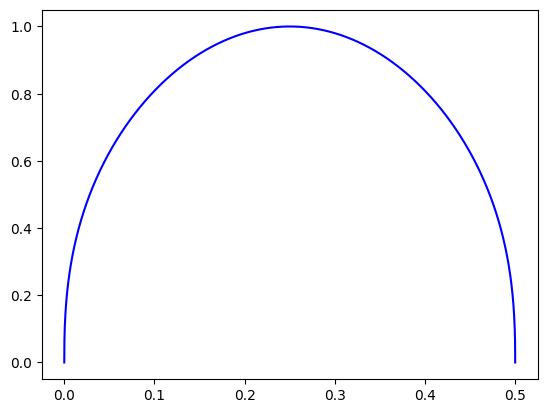

In [16]:
# That works, but even better is to make it flatter.  Here's a trick:
def flute_env(t):
    return sin(pi*t/t[-1])**0.4
plt.plot(t,flute_env(t),'b')
plt.plot(t,sine_env(t), 'r')

In [18]:
def sine_env(t):
    return sin(pi*t/t[-1]) #t[-1] = last value
#plt.plot(t,sine_env(t))
def flute_env(t):
    return sin(pi*t/t[-1])**0.4
def guitar_env(t):
    return (1-exp(-80*t))*exp(-8*t)

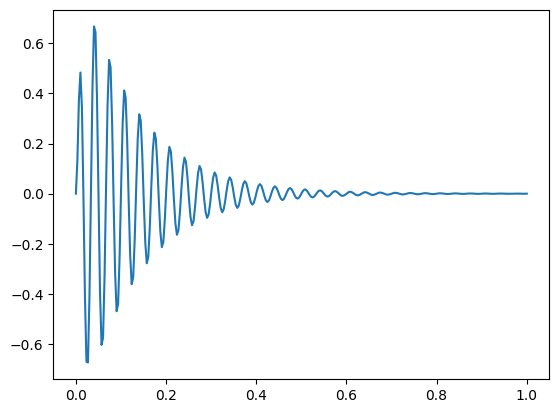

In [19]:
# guitar

s = np.linspace(0,1,300)
plt.plot(s,guitar_env(s)*sin(2*pi*30*s))

In [20]:
BaseNote = 440
depth = 0.6
tremfreq = 8
Fs = 22050

amsound = []
for note in mary:
    fnum, dur = note
    t = np.linspace(0,dur,int(dur*Fs))
    tremolo = 1 + depth*sin(2*pi*tremfreq*t)
    f = BaseNote * 2**((fnum-69)/12)
    sinusoid = cos(2*pi*f*t)
    amsound.append(guitar_env(t)  * tremolo * sinusoid)

amsound = np.concatenate(amsound)
Audio(amsound, rate=Fs)

In [21]:
import numpy as np
from IPython.display import Audio
from typing import List, Tuple

# 使用前一個 artifact 中定義的 MusicGenerator 類別
# 這裡只列出新增的代碼

class Notes:
    # 定義所需的音符（MIDI 音符編號）
    # 在 Norwegian Wood 中用到的音符
    E3, F3, G3 = 52, 53, 55
    A3, B3 = 57, 59
    C4, D4, E4, F4, G4 = 60, 62, 64, 65, 67
    A4, B4 = 69, 71
    C5, D5, E5 = 72, 74, 76
    REST = -1

def create_norwegian_wood(mg: MusicGenerator):
    # 主旋律
    melody = [
        # Part 1: "I once had a girl..."
        (Notes.E4, 0.5), (Notes.F4, 0.25), (Notes.G4, 0.25),
        (Notes.E4, 0.5), (Notes.B3, 0.5),
        (Notes.E4, 0.5), (Notes.F4, 0.25), (Notes.G4, 0.25),
        (Notes.E4, 1.0),

        # "or should I say..."
        (Notes.G4, 0.5), (Notes.A4, 0.25), (Notes.B4, 0.25),
        (Notes.C5, 0.5), (Notes.B4, 0.5),
        (Notes.A4, 0.5), (Notes.G4, 0.5),
        (Notes.E4, 1.0),

        # "She showed me her room..."
        (Notes.E4, 0.5), (Notes.F4, 0.25), (Notes.G4, 0.25),
        (Notes.E4, 0.5), (Notes.B3, 0.5),
        (Notes.E4, 0.5), (Notes.F4, 0.25), (Notes.G4, 0.25),
        (Notes.E4, 1.0),

        # "She asked me to stay..."
        (Notes.G4, 0.5), (Notes.A4, 0.25), (Notes.B4, 0.25),
        (Notes.C5, 0.5), (Notes.B4, 0.5),
        (Notes.A4, 0.5), (Notes.G4, 0.5),
        (Notes.E4, 1.0),
    ]

    # 吉他伴奏和弦進行
    guitar_accompaniment = [
        # Em
        (Notes.E3, 0.25), (Notes.B3, 0.25), (Notes.E4, 0.25), (Notes.G4, 0.25),
        # Em7
        (Notes.E3, 0.25), (Notes.B3, 0.25), (Notes.D4, 0.25), (Notes.G4, 0.25),
        # Em
        (Notes.E3, 0.25), (Notes.B3, 0.25), (Notes.E4, 0.25), (Notes.G4, 0.25),
        # Em7
        (Notes.E3, 0.25), (Notes.B3, 0.25), (Notes.D4, 0.25), (Notes.G4, 0.25),
    ] * 4  # 重複 4 次

    # 設定不同樂器的泛音
    sitar_harmonics = [
        (1.0, 1.0),   # 基頻
        (2.0, 0.5),   # 八度泛音
        (3.0, 0.3),   # 十二度泛音
        (4.0, 0.2),   # 雙八度泛音
        (5.0, 0.1),   # 大三度泛音
    ]

    guitar_harmonics = [
        (1.0, 1.0),
        (2.0, 0.5),
        (3.0, 0.2),
        (4.0, 0.1),
    ]

    # 生成主旋律（用西塔琴音色）
    melody_sound = mg.play_melody(
        melody,
        lambda t: mg.guitar_env(t) * (0.7 + 0.3 * np.sin(2 * np.pi * 10 * t)),  # 添加特殊的西塔琴顫音效果
        sitar_harmonics,
        volume=0.8
    )

    # 生成吉他伴奏
    guitar_sound = mg.play_melody(
        guitar_accompaniment,
        mg.guitar_env,
        guitar_harmonics,
        volume=0.6
    )

    return melody_sound, guitar_sound

def main():
    mg = MusicGenerator(sample_rate=44100)  # 使用更高的採樣率以獲得更好的音質
    melody_sound, guitar_sound = create_norwegian_wood(mg)

    # 合併音軌並播放
    complete_song = Audio(
        melody_sound.data + guitar_sound.data,
        rate=mg.sample_rate
    )
    return complete_song

if __name__ == "__main__":
    song = main()
    # 播放音樂
    display(song)

In [24]:
class ChordQuality(Enum):
    """和弦類型列舉"""
    MAJOR = "major"
    MINOR = "minor"
    DIMINISHED = "diminished"
    AUGMENTED = "augmented"
    DOMINANT7 = "dominant7"
    MAJOR7 = "major7"
    MINOR7 = "minor7"
    HALF_DIMINISHED7 = "half_diminished7"
    DIMINISHED7 = "diminished7"
    SUSPENDED2 = "sus2"
    SUSPENDED4 = "sus4"
    MAJOR6 = "major6"
    MINOR6 = "minor6"
    ADD9 = "add9"

class Chord:
    """和弦類別"""
    # 音程定義（相對於根音的半音數）
    INTERVALS = {
        ChordQuality.MAJOR: [0, 4, 7],
        ChordQuality.MINOR: [0, 3, 7],
        ChordQuality.DIMINISHED: [0, 3, 6],
        ChordQuality.AUGMENTED: [0, 4, 8],
        ChordQuality.DOMINANT7: [0, 4, 7, 10],
        ChordQuality.MAJOR7: [0, 4, 7, 11],
        ChordQuality.MINOR7: [0, 3, 7, 10],
        ChordQuality.HALF_DIMINISHED7: [0, 3, 6, 10],
        ChordQuality.DIMINISHED7: [0, 3, 6, 9],
        ChordQuality.SUSPENDED2: [0, 2, 7],
        ChordQuality.SUSPENDED4: [0, 5, 7],
        ChordQuality.MAJOR6: [0, 4, 7, 9],
        ChordQuality.MINOR6: [0, 3, 7, 9],
        ChordQuality.ADD9: [0, 4, 7, 14]
    }

    def __init__(self, root: int, quality: ChordQuality, inversion: int = 0):
        self.root = root
        self.quality = quality
        self.inversion = inversion

    def get_notes(self) -> List[int]:
        """獲取和弦的所有音符"""
        notes = [self.root + interval for interval in self.INTERVALS[self.quality]]
        # 處理轉位
        for _ in range(self.inversion):
            notes.append(notes.pop(0) + 12)
        return notes

class ChordProgression:
    """和弦進行類別"""
    def __init__(self):
        self.progression: List[Tuple[Chord, float]] = []  # (和弦, 持續時間)

    def add_chord(self, chord: Chord, duration: float):
        """添加和弦到進行"""
        self.progression.append((chord, duration))

    def get_full_notes(self) -> List[Tuple[List[int], float]]:
        """獲取完整的音符列表"""
        return [(chord.get_notes(), duration) for chord, duration in self.progression]

class EnhancedMusicGenerator:
    def __init__(self, sample_rate: int = 44100):
        self.sample_rate = sample_rate
        self.base_duration = 1
        self.base_note = 440  # A4

    def get_frequency(self, note: int) -> float:
        """計算音符的頻率"""
        return self.base_note * 2**((note-69)/12)

    def get_time_array(self, duration: float) -> np.ndarray:
        """生成時間陣列"""
        return np.linspace(0, duration, int(self.base_duration * self.sample_rate * duration))

    # 包絡函數
    @staticmethod
    def piano_env(t: np.ndarray) -> np.ndarray:
        """鋼琴音色的ADSR包絡"""
        attack = 0.005
        decay = 0.1
        sustain_level = 0.7
        release = 0.3

        normalized_t = t/t[-1]
        env = np.zeros_like(t)

        mask = normalized_t < attack
        env[mask] = normalized_t[mask]/attack
        mask = (normalized_t >= attack) & (normalized_t < attack + decay)
        env[mask] = 1 - (1-sustain_level)*(normalized_t[mask]-attack)/decay
        mask = (normalized_t >= attack + decay) & (normalized_t < 1 - release)
        env[mask] = sustain_level
        mask = normalized_t >= 1 - release
        env[mask] = sustain_level*(1-(normalized_t[mask]-(1-release))/release)

        return env

    def generate_chord(self,
                      chord: Chord,
                      duration: float,
                      envelope_func: callable,
                      harmonics: List[Tuple[float, float]] = [(1.0, 1.0)],
                      volume: float = 1.0) -> np.ndarray:
        """生成和弦聲音"""
        t = self.get_time_array(duration)
        chord_wave = np.zeros_like(t)

        for note in chord.get_notes():
            f = self.get_frequency(note)
            wave = np.zeros_like(t)
            for freq_mult, amp in harmonics:
                wave += amp * np.sin(2 * np.pi * f * freq_mult * t)
            chord_wave += wave

        return volume * envelope_func(t) * chord_wave / len(chord.get_notes())

    def play_chord_progression(self,
                             progression: ChordProgression,
                             envelope_func: callable,
                             harmonics: List[Tuple[float, float]] = [(1.0, 1.0)],
                             volume: float = 1.0) -> Audio:
        """演奏和弦進行"""
        sound = []
        for chord, duration in progression.progression:
            sound.append(self.generate_chord(chord, duration, envelope_func, harmonics, volume))
        return Audio(np.concatenate(sound), rate=self.sample_rate)

# 示範使用
def demo_chords():
    mg = EnhancedMusicGenerator()

    # 定義一個簡單的和弦進行
    progression = ChordProgression()

    # C major -> Am -> F -> G7 進行
    progression.add_chord(Chord(60, ChordQuality.MAJOR), 1.0)  # C
    progression.add_chord(Chord(57, ChordQuality.MINOR), 1.0)  # Am
    progression.add_chord(Chord(65, ChordQuality.MAJOR), 1.0)  # F
    progression.add_chord(Chord(67, ChordQuality.DOMINANT7), 1.0)  # G7

    # 定義鋼琴的泛音
    piano_harmonics = [
        (1.0, 1.0),
        (2.0, 0.5),
        (3.0, 0.25),
        (4.0, 0.1),
        (5.0, 0.05)
    ]

    return mg.play_chord_progression(
        progression,
        mg.piano_env,
        piano_harmonics,
        volume=0.8
    )

# Norwegian Wood 的和弦進行示例
def norwegian_wood_chords():
    mg = EnhancedMusicGenerator()
    progression = ChordProgression()

    # 主要和弦進行
    progression.add_chord(Chord(64, ChordQuality.MINOR), 2.0)  # Em
    progression.add_chord(Chord(64, ChordQuality.MINOR7), 2.0)  # Em7
    progression.add_chord(Chord(62, ChordQuality.MAJOR), 2.0)  # D
    progression.add_chord(Chord(67, ChordQuality.DOMINANT7), 2.0)  # G7
    progression.add_chord(Chord(60, ChordQuality.MAJOR), 2.0)  # C
    progression.add_chord(Chord(57, ChordQuality.MINOR), 2.0)  # Am
    progression.add_chord(Chord(64, ChordQuality.MINOR), 2.0)  # Em

    guitar_harmonics = [
        (1.0, 1.0),
        (2.0, 0.5),
        (3.0, 0.2),
        (4.0, 0.1)
    ]

    return mg.play_chord_progression(
        progression,
        mg.piano_env,
        guitar_harmonics,
        volume=0.7
    )

if __name__ == "__main__":
    # 演示基本和弦進行
    basic_progression = demo_chords()
    display(basic_progression)

    # 演示 Norwegian Wood 和弦進行
    norwegian_wood = norwegian_wood_chords()
    display(norwegian_wood)

In [25]:
import numpy as np
from IPython.display import Audio
from typing import List, Tuple, Optional
from enum import Enum

# 使用前面定義的 ChordQuality, Chord, ChordProgression 和 EnhancedMusicGenerator 類別

class NorwegianWood:
    def __init__(self, sample_rate: int = 44100):
        self.mg = EnhancedMusicGenerator(sample_rate)
        self.tempo = 108  # BPM
        self.beat_duration = 60 / self.tempo

    def get_duration(self, beats: float) -> float:
        """將節拍轉換為秒數"""
        return beats * self.beat_duration

    def create_melody(self) -> List[Tuple[int, float]]:
        """完整的主旋律"""
        Notes = {
            'E4': 64, 'F4': 65, 'G4': 67, 'A4': 69, 'B4': 71,
            'C5': 72, 'D5': 74, 'E5': 76,
            'B3': 59, 'E3': 52, 'REST': -1
        }

        verse_1 = [
            # I once had a girl
            (Notes['E4'], self.get_duration(1)),
            (Notes['F4'], self.get_duration(0.5)),
            (Notes['G4'], self.get_duration(0.5)),
            (Notes['E4'], self.get_duration(1)),
            (Notes['B3'], self.get_duration(1)),

            # Or should I say
            (Notes['E4'], self.get_duration(1)),
            (Notes['F4'], self.get_duration(0.5)),
            (Notes['G4'], self.get_duration(0.5)),
            (Notes['E4'], self.get_duration(2)),

            # She showed me her room
            (Notes['G4'], self.get_duration(1)),
            (Notes['A4'], self.get_duration(0.5)),
            (Notes['B4'], self.get_duration(0.5)),
            (Notes['C5'], self.get_duration(1)),
            (Notes['B4'], self.get_duration(1)),

            # Isn't it good Norwegian wood
            (Notes['A4'], self.get_duration(1)),
            (Notes['G4'], self.get_duration(1)),
            (Notes['E4'], self.get_duration(2))
        ]

        verse_2 = [
            # She asked me to stay
            (Notes['E4'], self.get_duration(1)),
            (Notes['F4'], self.get_duration(0.5)),
            (Notes['G4'], self.get_duration(0.5)),
            (Notes['E4'], self.get_duration(1)),
            (Notes['B3'], self.get_duration(1)),

            # And she told me to sit anywhere
            (Notes['E4'], self.get_duration(1)),
            (Notes['F4'], self.get_duration(0.5)),
            (Notes['G4'], self.get_duration(0.5)),
            (Notes['E4'], self.get_duration(2)),

            # So I looked around
            (Notes['G4'], self.get_duration(1)),
            (Notes['A4'], self.get_duration(0.5)),
            (Notes['B4'], self.get_duration(0.5)),
            (Notes['C5'], self.get_duration(1)),
            (Notes['B4'], self.get_duration(1)),

            # And I noticed there wasn't a chair
            (Notes['A4'], self.get_duration(1)),
            (Notes['G4'], self.get_duration(1)),
            (Notes['E4'], self.get_duration(2))
        ]

        return verse_1 + verse_2

    def create_chord_progression(self) -> ChordProgression:
        """完整的和弦進行"""
        progression = ChordProgression()

        # 和弦進行模式
        chord_pattern = [
            (Chord(64, ChordQuality.MINOR), 2),    # Em
            (Chord(64, ChordQuality.MINOR7), 2),   # Em7
            (Chord(62, ChordQuality.MAJOR), 2),    # D
            (Chord(67, ChordQuality.DOMINANT7), 2), # G7
            (Chord(60, ChordQuality.MAJOR), 2),    # C
            (Chord(57, ChordQuality.MINOR), 2),    # Am
            (Chord(64, ChordQuality.MINOR), 2),    # Em
            (Chord(64, ChordQuality.MINOR7), 2),   # Em7
        ]

        # 添加兩個段落的和弦
        for _ in range(2):
            for chord, beats in chord_pattern:
                progression.add_chord(chord, self.get_duration(beats))

        return progression

    def create_sitar_sound(self, melody: List[Tuple[int, float]]) -> np.ndarray:
        """生成西塔琴聲音"""
        sitar_harmonics = [
            (1.0, 1.0),   # 基頻
            (2.0, 0.5),   # 八度泛音
            (3.0, 0.3),   # 十二度泛音
            (4.0, 0.2),   # 雙八度泛音
            (5.0, 0.1),   # 高泛音
            (6.0, 0.05)   # 更高泛音
        ]

        def sitar_envelope(t):
            """特殊的西塔琴包絡"""
            env = self.mg.piano_env(t)
            # 添加特徵性的顫音效果
            vibrato = 1 + 0.15 * np.sin(2 * np.pi * 7 * t)
            return env * vibrato

        sound = []
        for note, duration in melody:
            if note != -1:  # 不是休止符
                t = self.mg.get_time_array(duration)
                wave = np.zeros_like(t)
                f = self.mg.get_frequency(note)

                for harm_mult, harm_amp in sitar_harmonics:
                    wave += harm_amp * np.sin(2 * np.pi * f * harm_mult * t)

                wave = wave * sitar_envelope(t)
                sound.append(wave)
            else:
                # 休止符
                sound.append(np.zeros(int(duration * self.mg.sample_rate)))

        return np.concatenate(sound) * 0.7  # 調整音量

    def create_guitar_accompaniment(self, progression: ChordProgression) -> np.ndarray:
        """生成吉他伴奏"""
        guitar_harmonics = [
            (1.0, 1.0),
            (2.0, 0.5),
            (3.0, 0.2),
            (4.0, 0.1),
            (5.0, 0.05)
        ]

        def guitar_pattern_envelope(t):
            """吉他撥弦包絡"""
            return np.exp(-5 * t/t[-1]) * (1 - np.exp(-50 * t/t[-1]))

        sound = []
        for chord, duration in progression.progression:
            # 為每個和弦創建指彈圖案
            pattern_duration = duration / 4  # 將和弦分成四個部分
            for _ in range(4):
                notes = chord.get_notes()
                t = self.mg.get_time_array(pattern_duration)
                wave = np.zeros_like(t)

                for note in notes:
                    f = self.mg.get_frequency(note)
                    for harm_mult, harm_amp in guitar_harmonics:
                        wave += harm_amp * np.sin(2 * np.pi * f * harm_mult * t)

                wave = wave * guitar_pattern_envelope(t)
                sound.append(wave)

        return np.concatenate(sound) * 0.5  # 調整音量

    def create_complete_song(self) -> Audio:
        """生成完整的歌曲"""
        # 創建各部分
        melody = self.create_melody()
        progression = self.create_chord_progression()

        # 生成聲音
        sitar_sound = self.create_sitar_sound(melody)
        guitar_sound = self.create_guitar_accompaniment(progression)

        # 確保兩個軌道長度相同
        max_length = max(len(sitar_sound), len(guitar_sound))
        if len(sitar_sound) < max_length:
            sitar_sound = np.pad(sitar_sound, (0, max_length - len(sitar_sound)))
        if len(guitar_sound) < max_length:
            guitar_sound = np.pad(guitar_sound, (0, max_length - len(guitar_sound)))

        # 混音
        final_sound = sitar_sound + guitar_sound

        # 正規化音量
        final_sound = final_sound / np.max(np.abs(final_sound))

        return Audio(final_sound, rate=self.mg.sample_rate)

def main():
    """主函數"""
    norwegian_wood = NorwegianWood()
    song = norwegian_wood.create_complete_song()
    return song

if __name__ == "__main__":
    song = main()
    display(song)

In [ ]:
# Error code 1
#.    sample_rate = int(html_repr[start_index:end_index])
#     ValueError: invalid literal for int() with base 10

from scipy.io.wavfile import write

def save_song_to_file(song_audio, filename="song.wav", sample_rate=44100):
    """Saves the generated song audio to a WAV file.

    Args:
        song_audio: The Audio object containing the song data.
        filename: The desired filename for the WAV file (default: "song.wav").
    """
    # Access the sample rate and data directly using _repr_html_ method
    html_repr = song_audio._repr_html_()
    start_index = html_repr.find("rate=") + 5  # Find the start of the rate value
    end_index = html_repr.find(",", start_index)  # Find the end of the rate value
    sample_rate = int(html_repr[start_index:end_index])  # Extract the rate

    # Assume data is in song_audio.data
    data = song_audio.data
    write(filename, sample_rate, data)

# Assuming you have the 'song' variable from your previous code
save_song_to_file(song, filename="norwegian_wood.wav")

In [ ]:
# Error code 2
#
#. AttributeError: 'bytes' object has no attribute 'dtype'

from scipy.io.wavfile import write

def save_song_to_file(song_audio, filename="song.wav", sample_rate=44100):
    """Saves the generated song audio to a WAV file.

    Args:
        song_audio: The Audio object containing the song data.
        filename: The desired filename for the WAV file (default: "song.wav").
    """
    # Instead of parsing HTML, access the sample rate directly if available

    # Check if the Audio object has a 'rate' attribute
    if hasattr(song_audio, 'rate'):
        sample_rate = song_audio.rate
    else:
        # If 'rate' attribute is not found, use the default or raise an exception
        sample_rate = 44100  # Or raise an exception if the rate is essential
        print("Warning: Sample rate not found in Audio object. Using default:", sample_rate)

    # Assume data is in song_audio.data (or adjust based on your Audio object)
    data = song_audio.data

    write(filename, sample_rate, data)

# Assuming you have the 'song' variable from your previous code
save_song_to_file(song, filename="norwegian_wood.wav")

In [26]:
from scipy.io.wavfile import write
import numpy as np

def save_song_to_file(song_audio, filename="song.wav", sample_rate=44100):
    """Saves the generated song audio to a WAV file.

    Args:
        song_audio: The Audio object containing the song data.
        filename: The desired filename for the WAV file (default: "song.wav").
    """
    # Instead of parsing HTML, access the sample rate directly if available

    # Check if the Audio object has a 'rate' attribute
    if hasattr(song_audio, 'rate'):
        sample_rate = song_audio.rate
    else:
        # If 'rate' attribute is not found, use the default or raise an exception
        sample_rate = 44100  # Or raise an exception if the rate is essential
        print("Warning: Sample rate not found in Audio object. Using default:", sample_rate)

    # Assume data is in song_audio.data (or adjust based on your Audio object)
    # Convert the bytes data to a NumPy array
    data = np.frombuffer(song_audio.data, dtype=np.int16)

    write(filename, sample_rate, data)

# Assuming you have the 'song' variable from your previous code
save_song_to_file(song, filename="norwegian_wood.wav")